## Attrition Risk Model

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('IBM.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [4]:
df.shape

(1470, 13)

In [5]:
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

In [6]:
varlist = ['Attrition']

In [7]:
df[varlist] = df[varlist].apply(binary_map)

In [8]:
# df.Marriage = df.Marriage.apply(lambda x : 1 if x == 'Yes' else 0)
# df.Retired = df.Retired.apply(lambda x : 1 if x == 'Yes' else 0)
# df.Medical_Category = df.Medical_Category.apply(lambda x : 1 if x == 'S1A1' else 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 149.4+ KB


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [12]:
X.shape

(1470, 12)

In [13]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [14]:
num_features

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [15]:
cat_features

Index(['Department', 'EducationField', 'MaritalStatus'], dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Department               1470 non-null   object
 2   DistanceFromHome         1470 non-null   int64 
 3   Education                1470 non-null   int64 
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   JobSatisfaction          1470 non-null   int64 
 7   MaritalStatus            1470 non-null   object
 8   MonthlyIncome            1470 non-null   int64 
 9   NumCompaniesWorked       1470 non-null   int64 
 10  WorkLifeBalance          1470 non-null   int64 
 11  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 137.9+ KB


In [18]:
scaler = StandardScaler()

X[num_features] = scaler.fit_transform(X[num_features])
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,0.446350,Sales,-1.010909,-0.891688,Life Sciences,-0.660531,1.153254,Single,-0.108350,2.125136,-2.493820,-0.164613
1,1.322365,Research & Development,-0.147150,-1.868426,Life Sciences,0.254625,-0.660853,Married,-0.291719,-0.678049,0.338096,0.488508
2,0.008343,Research & Development,-0.887515,-0.891688,Other,1.169781,0.246200,Single,-0.937654,1.324226,0.338096,-1.144294
3,-0.429664,Research & Development,-0.764121,1.061787,Life Sciences,1.169781,0.246200,Married,-0.763634,-0.678049,0.338096,0.161947
4,-1.086676,Research & Development,-0.887515,-1.868426,Medical,-1.575686,-0.660853,Married,-0.644858,2.525591,0.338096,-0.817734


In [19]:
cat_features

Index(['Department', 'EducationField', 'MaritalStatus'], dtype='object')

In [20]:
# creating dummies for categorical variables

for i in cat_features:
    dpt = pd.get_dummies(X[i], prefix=i, drop_first=True)
    dpt = dpt.astype(int)
    X = X.drop(i, axis=1)
    X = pd.concat([X, dpt], axis=1)    

In [21]:
X.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,-1.010909,-0.891688,-0.660531,1.153254,-0.108350,2.125136,-2.493820,-0.164613,0,1,1,0,0,0,0,0,1
1,1.322365,-0.147150,-1.868426,0.254625,-0.660853,-0.291719,-0.678049,0.338096,0.488508,1,0,1,0,0,0,0,1,0
2,0.008343,-0.887515,-0.891688,1.169781,0.246200,-0.937654,1.324226,0.338096,-1.144294,1,0,0,0,0,1,0,0,1
3,-0.429664,-0.764121,1.061787,1.169781,0.246200,-0.763634,-0.678049,0.338096,0.161947,1,0,1,0,0,0,0,1,0
4,-1.086676,-0.887515,-1.868426,-1.575686,-0.660853,-0.644858,2.525591,0.338096,-0.817734,1,0,0,0,1,0,0,1,0


<Axes: >

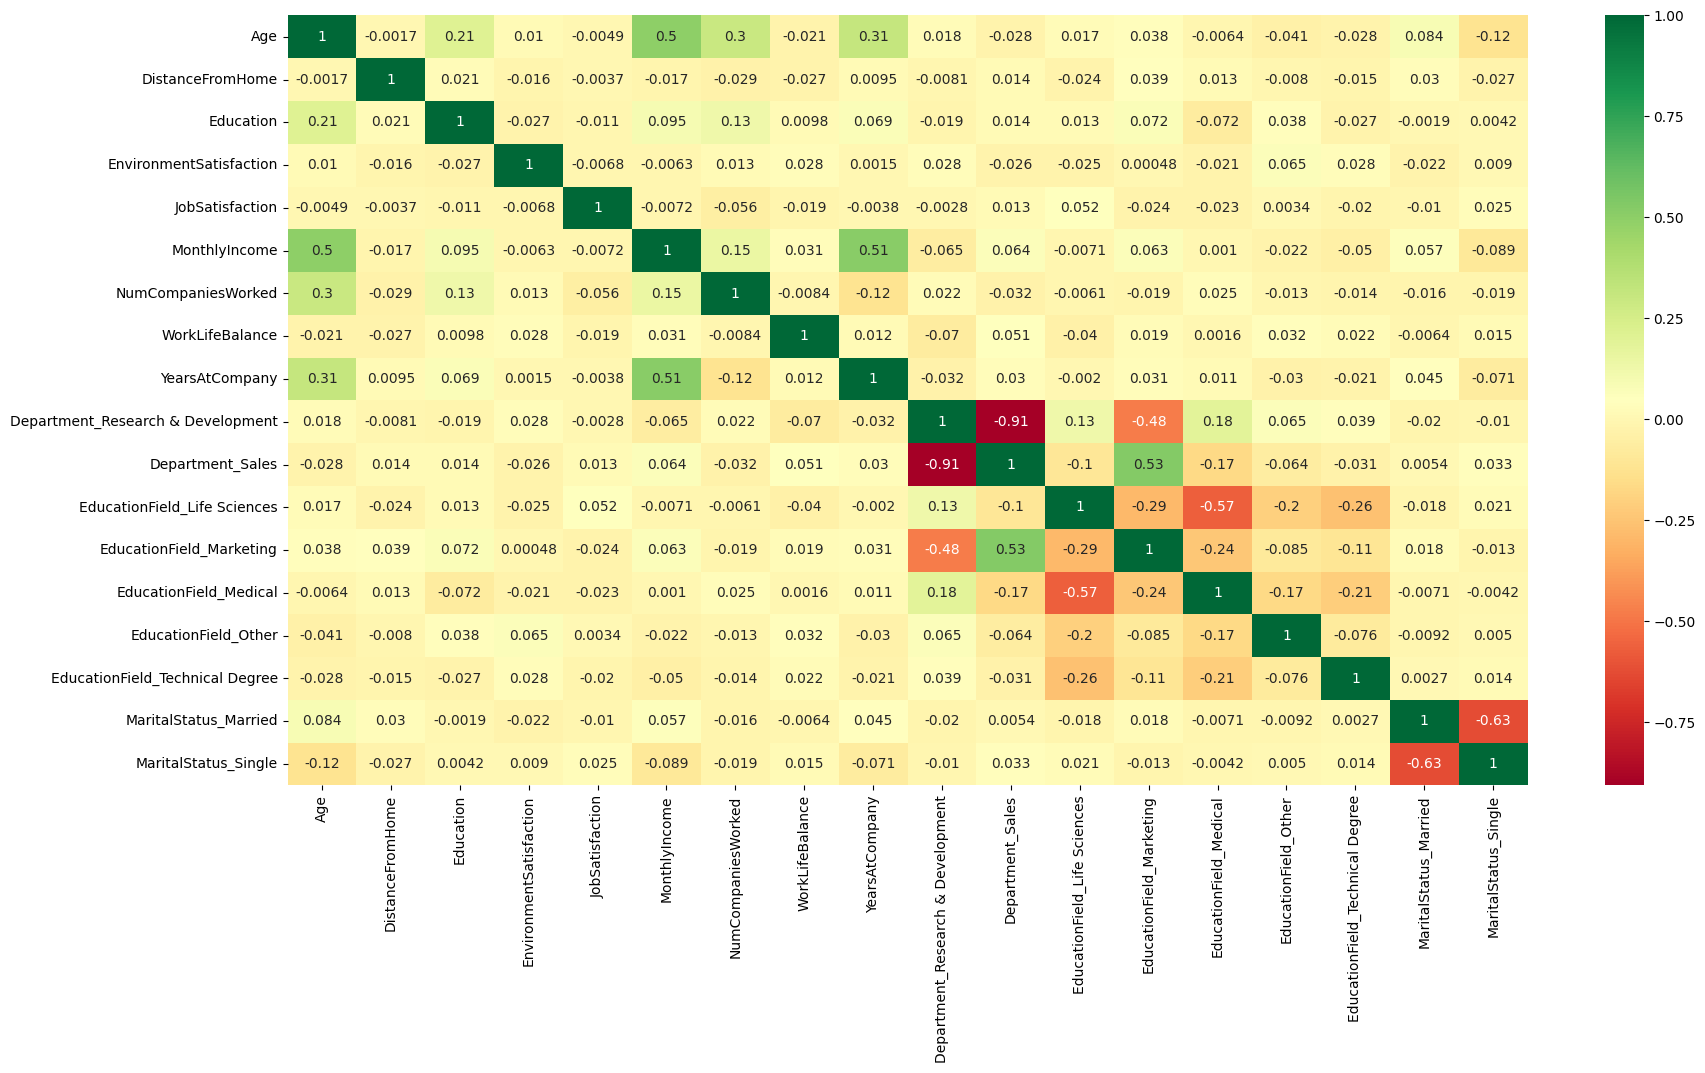

In [22]:
plt.figure(figsize=[20,10])

sns.heatmap(X.corr(), cmap='RdYlGn', annot=True)

In [23]:
X = X.drop('Department_Sales', axis=1)

<Axes: >

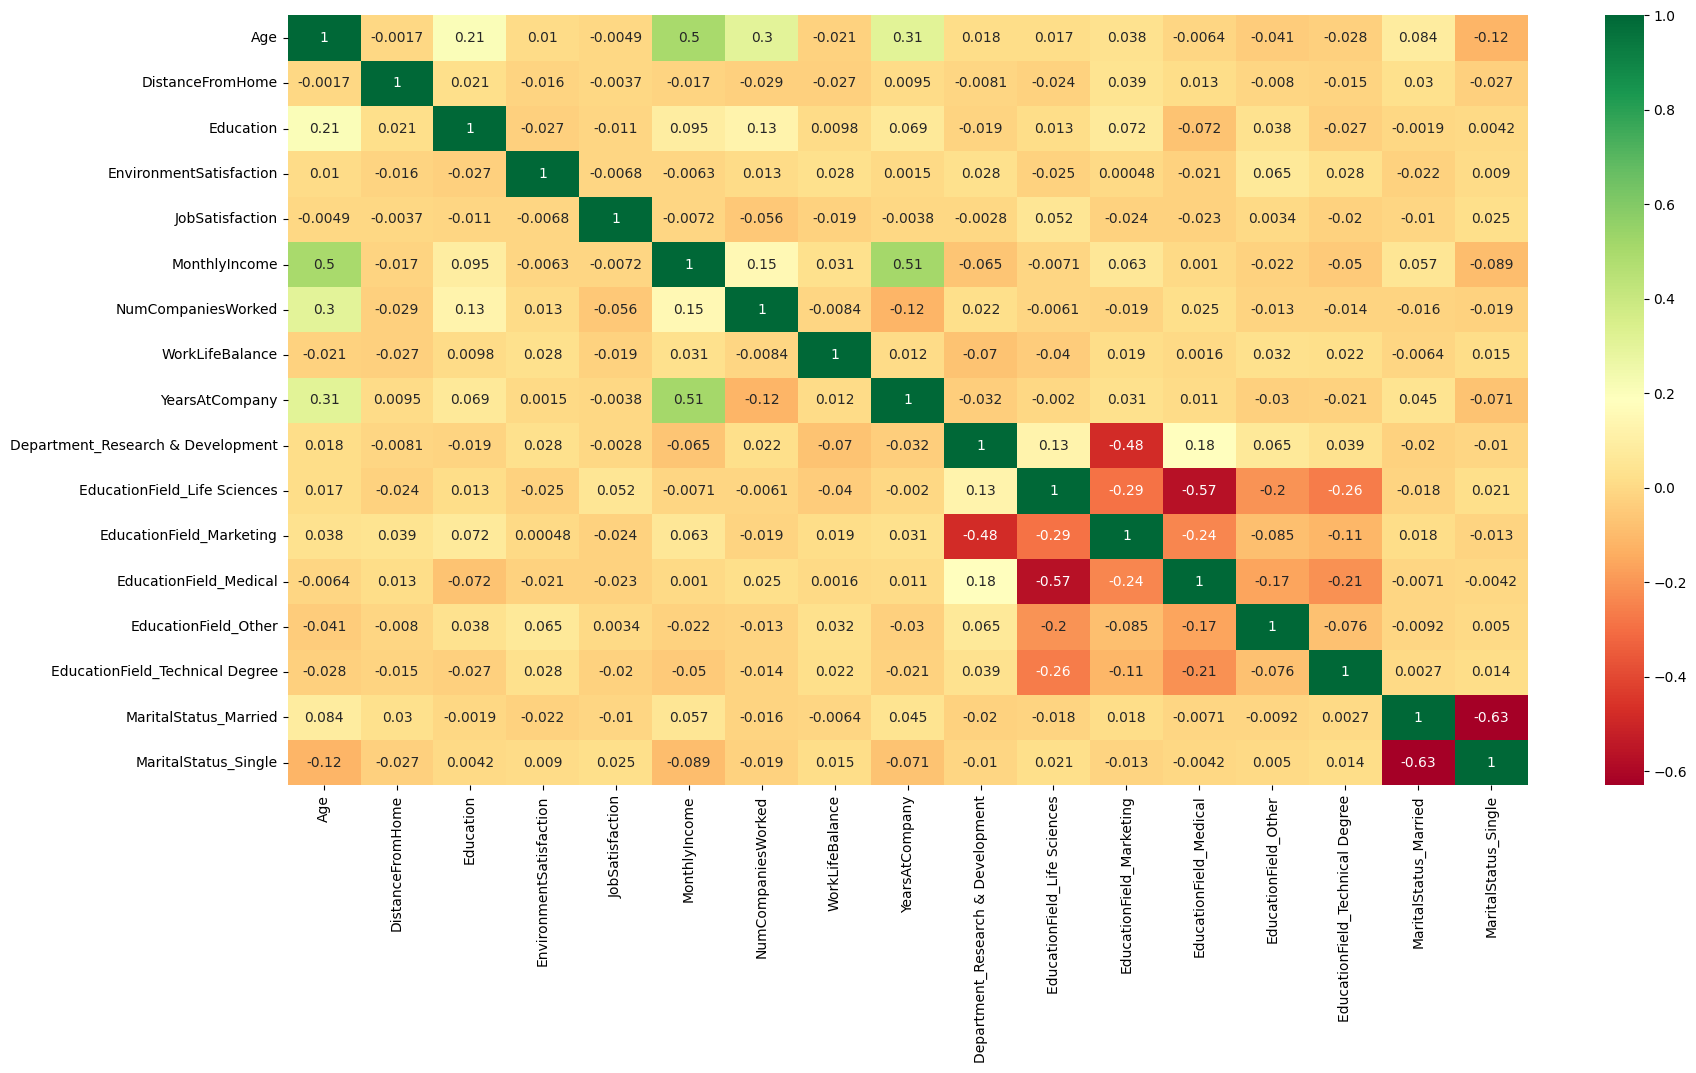

In [24]:
plt.figure(figsize=[20,10])

sns.heatmap(X.corr(), cmap='RdYlGn', annot=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)

In [27]:
d = {
    'X_train': [len(X_train)],
    'y_train':[ len(y_train)],
    'X_test': [len(X_test)],
    'y_test': [len(y_test)]
}

dataframe = pd.DataFrame(d)
dataframe

,X_train,y_train,X_test,y_test
0,1176,1176,294,294


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr_model = LogisticRegression()
lr_model.fit (X_train, y_train)

LogisticRegression()

In [30]:
y_pred = lr_model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8707482993197279

In [33]:
# Training accuracy

y_train_pred = lr_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.8452380952380952

## Using stats model

In [34]:
import statsmodels.api as sm 

In [35]:
logml = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                            GLM   Df Residuals:                     1158
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -454.12
Date:                Mon, 28 Aug 2023   Deviance:                       908.25
Time:                        16:18:50   Pearson chi2:                 1.39e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.6723      0.541     -3.093      0.002      -2.732      -0.613
Age                                  -0.3138      0.109     -2.886      0.004      -0.527      -0.101
DistanceFromHome                      0.2234      0.081      2.759      0.006       0.065       0.382
Education                             0.0078      0.087      0.089      0.929      -0.164       0.179
EnvironmentSatisfaction              -0.2535      0.085     -2.968      0.003      -0.421      -0.086
JobSatisfaction                      -0.3242      0.085     -3.821      0.000      -0.490      -0.158
MonthlyIncome                        -0.5079      0.148     -3.434      0.001      -0.798      -0.218
NumCompaniesWorked                    0.3554      0.088      4.055      0.000       0.184       0.527
WorkLifeBalance                      -0.2283      0.085     -2.687      0.007      -0.395      -0.062
YearsAtCompany                       -0.0750      0.131     -0.571      0.568      -0.332       0.182
Department_Research & Development    -0.5684      0.204     -2.793      0.005      -0.967      -0.170
EducationField_Life Sciences         -0.5996      0.550     -1.089      0.276      -1.679       0.479
EducationField_Marketing             -0.3956      0.567     -0.697      0.486      -1.508       0.717
EducationField_Medical               -0.6953      0.560     -1.242      0.214      -1.793       0.402
EducationField_Other                 -0.4885      0.638     -0.765      0.444      -1.739       0.762
EducationField_Technical Degree      -0.0022      0.592     -0.004      0.997      -1.162       1.158
MaritalStatus_Married                 0.3815      0.255      1.498      0.134      -0.118       0.881
MaritalStatus_Single                  1.3536      0.254      5.339      0.000       0.857       1.851
=====================================================================================================
"""

In [36]:
# check for the VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
col = X_train.columns
col

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany',
       'Department_Research & Development', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [38]:
# create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
9,Department_Research & Development,3.97
10,EducationField_Life Sciences,3.79
12,EducationField_Medical,3.22
15,MaritalStatus_Married,2.91
16,MaritalStatus_Single,2.31
5,MonthlyIncome,1.70
14,EducationField_Technical Degree,1.60
0,Age,1.56
8,YearsAtCompany,1.48
13,EducationField_Other,1.42


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate some example data
# np.random.seed(42)
# X = np.random.rand(100, 2)  # Features
# y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target based on sum of features

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a LogisticRegression model with hyperparameters
logreg = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=100)

# Fit the model to the training data
logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.87


In [40]:
from sklearn.metrics import confusion_matrix


# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[251   4]
 [ 34   5]]


In [41]:
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

# Calculate accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

print("Accuracy:", accuracy)

Accuracy: 0.8707482993197279


## Metrics beyond only accuracy

In [42]:
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

In [43]:
# Let's see the sensitivity of our logistic regression

print(f'sensitivity : {TP/float(TP+FN)} \nspecificity : {TN/float(TN+FP)}')
print(f'false postive rate : {FP/ float(TN+FP)} \npositive predictive value : {TP / float(TP+FP)}')
print(f'Negative predictive value : {TN / float(TN+ FN)}')

sensitivity : 0.1282051282051282 
specificity : 0.984313725490196
false postive rate : 0.01568627450980392 
positive predictive value : 0.5555555555555556
Negative predictive value : 0.8807017543859649


## Plotting ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

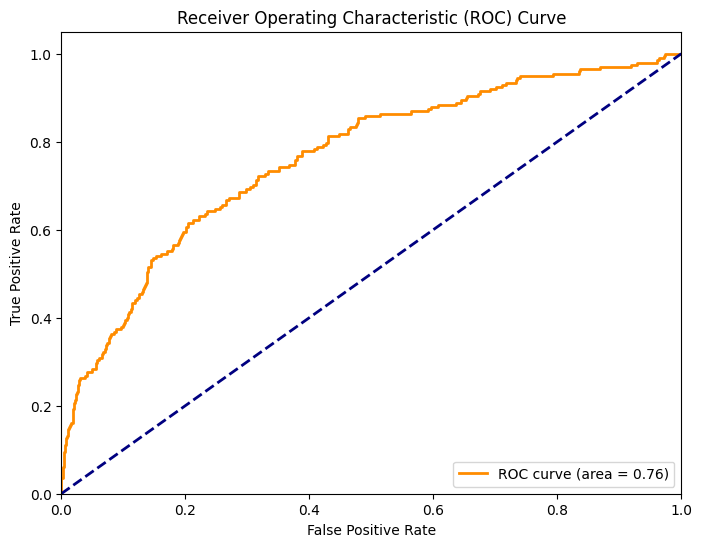

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# # Generate example data
# X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train a logistic regression model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = lr_model.predict_proba(X_train)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Finding optimal cutoff point

In [45]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_scores})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.287037,1097
1,0,0.304967,727
2,0,0.095271,254
3,0,0.087018,1175
4,0,0.093160,1341


In [46]:
## creating new column 'predicted' with 1 if churn prob >0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x : 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.287037,1097,0
1,0,0.304967,727,0
2,0,0.095271,254,0
3,0,0.087018,1175,0
4,0,0.093160,1341,0


In [47]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[962  16]
 [166  32]]


In [48]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8452380952380952


In [49]:
# Let's create columns with different probability cutoffs

numbers  = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.287037,1097,0,1,1,1,0,0,0,0,0,0,0
1,0,0.304967,727,0,1,1,1,1,0,0,0,0,0,0
2,0,0.095271,254,0,1,0,0,0,0,0,0,0,0,0
3,0,0.087018,1175,0,1,0,0,0,0,0,0,0,0,0
4,0,0.093160,1341,0,1,0,0,0,0,0,0,0,0,0


In [50]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1]
# TN = confusion[0,0]
# FP = confusion[0,1]
# FN = confusion[1,0]

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.168367  1.000000  0.000000
0.1   0.1  0.524660  0.863636  0.456033
0.2   0.2  0.738095  0.641414  0.757669
0.3   0.3  0.809524  0.414141  0.889571
0.4   0.4  0.846088  0.262626  0.964213
0.5   0.5  0.845238  0.161616  0.983640
0.6   0.6  0.839286  0.065657  0.995910
0.7   0.7  0.835034  0.020202  1.000000
0.8   0.8  0.833333  0.010101  1.000000
0.9   0.9  0.831633  0.000000  1.000000


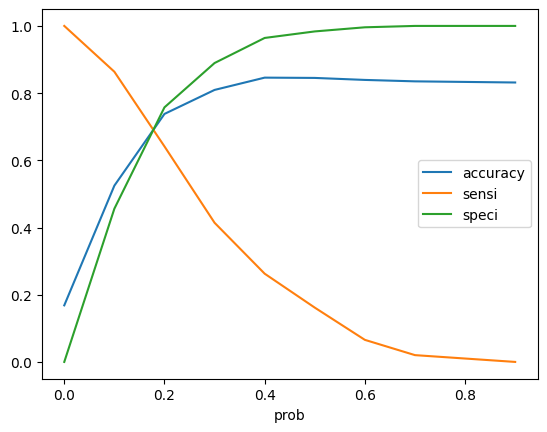

In [51]:
# let's plot accureacy sensitivity and specificity for various proabability

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

In [63]:
## From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.287037,1097,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.304967,727,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.095271,254,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.087018,1175,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.093160,1341,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8392857142857143

## Using Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Load your dataset and split it into features (X) and labels (y)
# X = ...
# y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8605442176870748


# Using SVM

In [83]:
from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Load your dataset and split it into features (X) and labels (y)
# X = ...
# y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.3, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8843537414965986


# Using KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Load your dataset and split it into features (X) and labels (y)
# X = ...
# y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8809523809523809


# Using XGBoost

In [100]:
import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Load your dataset and split it into features (X) and labels (y)
# X = ...
# y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.01, random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8707482993197279


In [105]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Load your dataset and split it into features (X) and labels (y)
# X = ...
# y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a sequential neural network model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/20
37/37 [==============================] - 1s 6ms/step - loss: 0.5482 - accuracy: 0.7636 - val_loss: 0.3963 - val_accuracy: 0.8673
Epoch 2/20
37/37 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8316 - val_loss: 0.3710 - val_accuracy: 0.8707
Epoch 3/20
37/37 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8410 - val_loss: 0.3585 - val_accuracy: 0.8741
Epoch 4/20
37/37 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8435 - val_loss: 0.3591 - val_accuracy: 0.8810
Epoch 5/20
37/37 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8486 - val_loss: 0.3603 - val_accuracy: 0.8741
Epoch 6/20
37/37 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8520 - val_loss: 0.3587 - val_accuracy: 0.8707
Epoch 7/20
37/37 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.8512 - val_loss: 0.3583 - val_accuracy: 0.8707
Epoch 8/20
37/37 [==